In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML, display_html

In [2]:
df = pd.read_excel(r'C:/Users/Acer/Desktop/Research/Market indices DailyBanks2008.xlsx', header =0)

In [3]:
df.head()

,Date,ASPI,Banks_finance_insurance
0,2008-01-02,2560.10,5059.11
1,2008-01-03,2529.96,5033.06
2,2008-01-04,2510.40,4970.36
3,2008-01-07,2488.55,4963.44
4,2008-01-08,2432.21,4909.06


In [4]:
df.shape

(2221, 3)

In [5]:
df.dtypes

Date                       datetime64[ns]
ASPI                              float64
Banks_finance_insurance           float64
dtype: object

In [6]:
df.describe()

,ASPI,Banks_finance_insurance
count,2221.000000,2221.000000
mean,5362.548874,12440.647776
std,1788.476749,4884.861153
min,1484.530000,2784.500000
25%,4219.600000,8572.840000
50%,6007.650000,13485.540000
75%,6678.050000,16287.620000
max,7811.800000,19828.660000


In [7]:
# check the time period start data and end date

In [8]:
print('Time period start: {}\nTime period end: {}'.format(df.Date.min(),df.Date.max()))

Time period start: 2008-01-02 00:00:00
Time period end: 2017-03-31 00:00:00


In [9]:
y = df.set_index('Date')

In [10]:
y.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-16',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name='Date', length=2221, freq=None)

In [11]:
# check the sum of null values of each column.  now y is date

In [12]:
y.isnull().sum()

ASPI                       0
Banks_finance_insurance    0
dtype: int64

In [13]:
# plot each and every column values with date

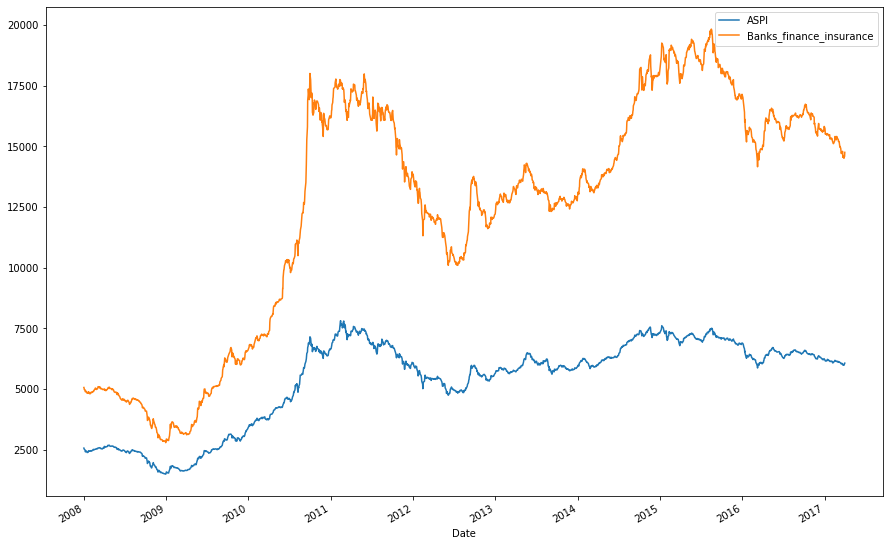

In [14]:
y.plot(figsize=(15, 10))
plt.show()


In [15]:
# next get idea about the structure of the data we review plots of the desnsity of observations

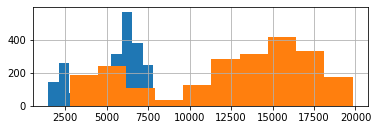

In [16]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
# second raw 1st column 1st number plot
# plot histogram with time and ASPI value
y.ASPI.hist()
y.Banks_finance_insurance.hist()

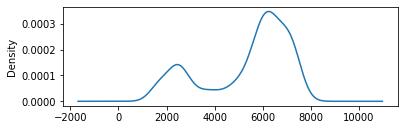

In [17]:
pyplot.subplot(212)
y.ASPI.plot(kind='kde')
pyplot.show()

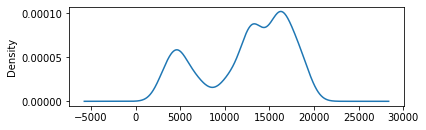

In [18]:
pyplot.subplot(212)
y.Banks_finance_insurance.plot(kind='kde')
pyplot.show()

In [19]:
# Next check the correlation coefficient between the variables to check tha relationship. negative correlation variables are removed

In [20]:
df.corr()

,ASPI,Banks_finance_insurance
ASPI,1.000000,0.987871
Banks_finance_insurance,0.987871,1.000000


In [21]:
#Decomposing using statsmodel
#With statsmodels we will be able to see the trend, seasonal, and residual components of our data.
# Using rcparams we can customize matpoltlib properties

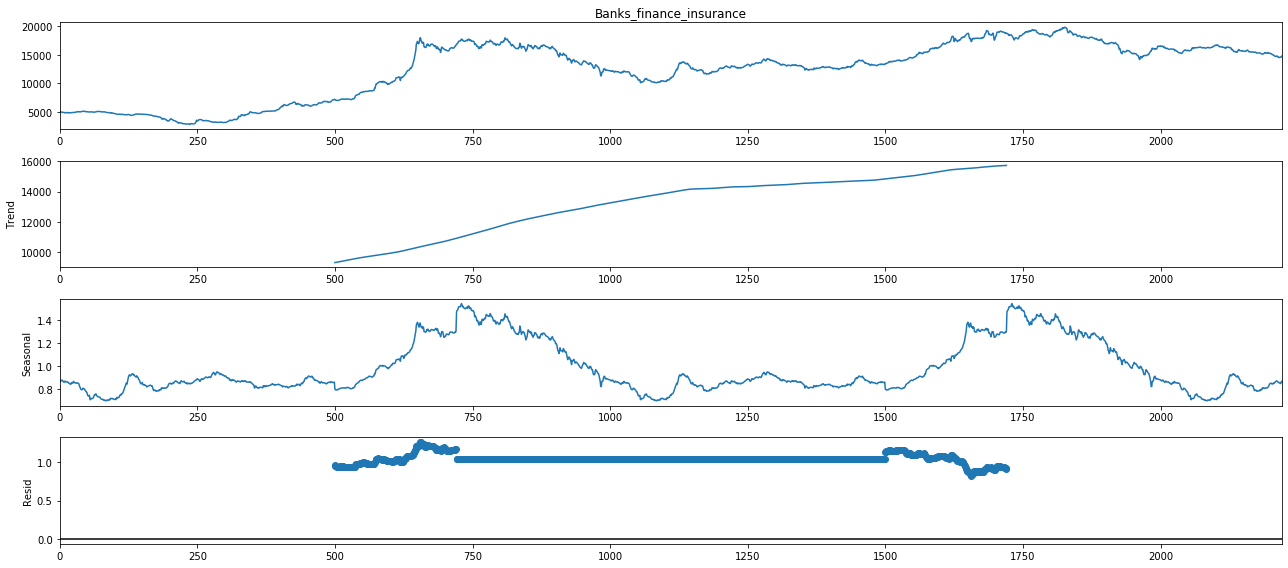

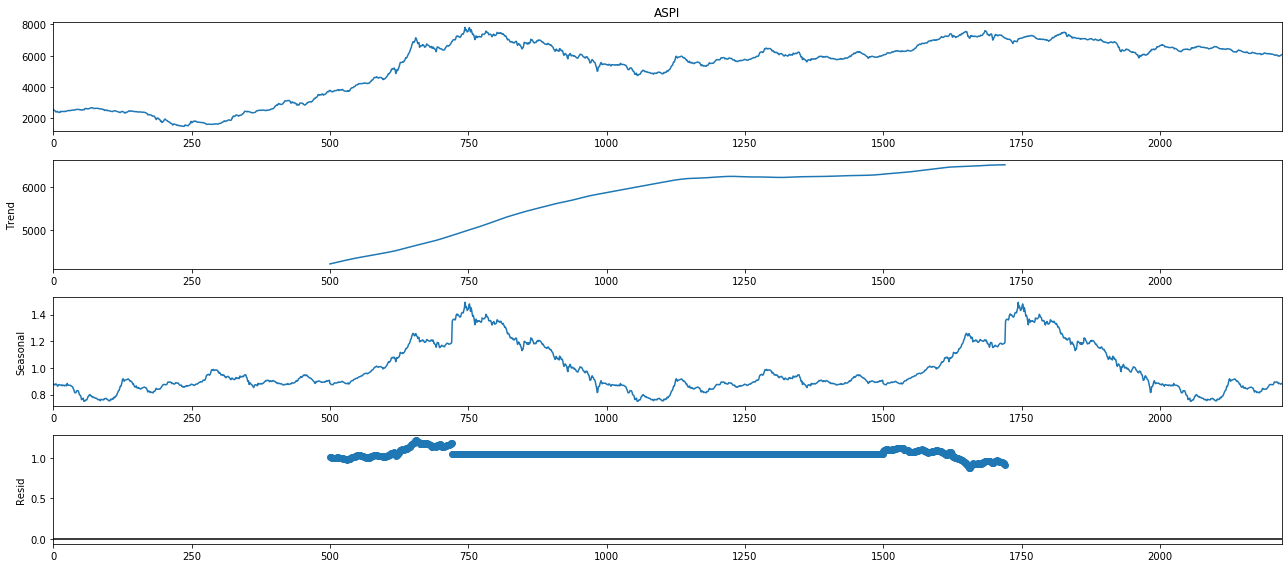

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition1 = sm.tsa.seasonal_decompose(df['Banks_finance_insurance'], model='multiplicative',freq=1000)
decomposition2 = sm.tsa.seasonal_decompose(df['ASPI'], model='multiplicative',freq=1000)
# In here without frequency get valuerror You must specify a freq or x must be a pandas object with a timeseries index
# you can give any value as a frequency.
fig = decomposition1.plot()
fig = decomposition2.plot()
plt.show()

In [23]:
# next check the Stationarity of time series. if data set is have Stationarity we can't use time series forecasting models for
# that time series. stationarity means statistical properties such as mean, variance remain constant over time.

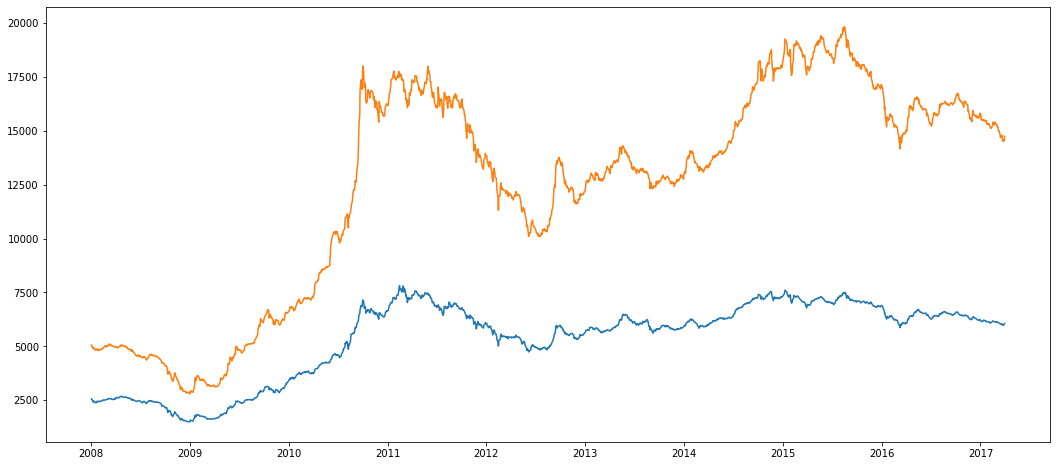

In [24]:
plt.plot(y)

In [25]:
# data set have no constant values so we can use timeseries forecasting methods

In [26]:
# now use ACF and PACF plots to check the stationarity

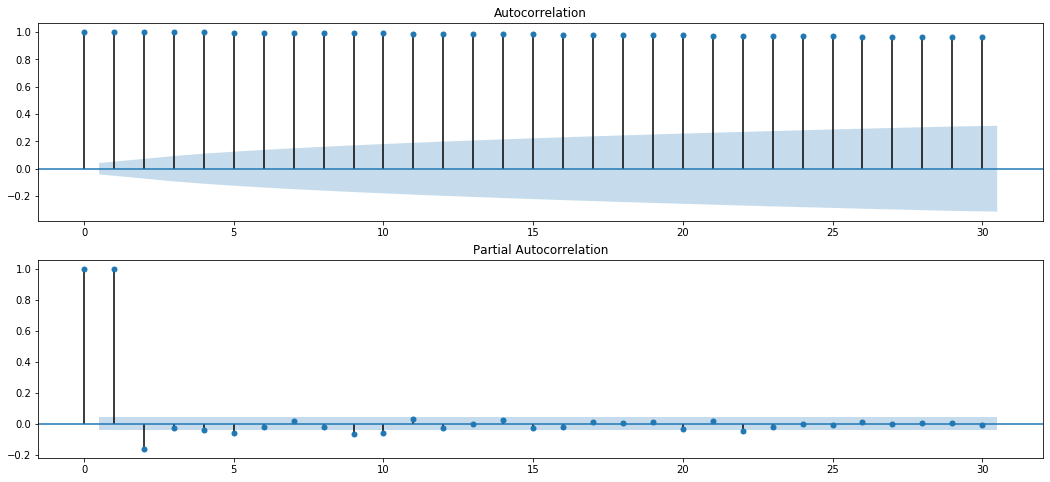

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(y.ASPI, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.ASPI, ax=pyplot.gca(), lags = 30)
pyplot.show()

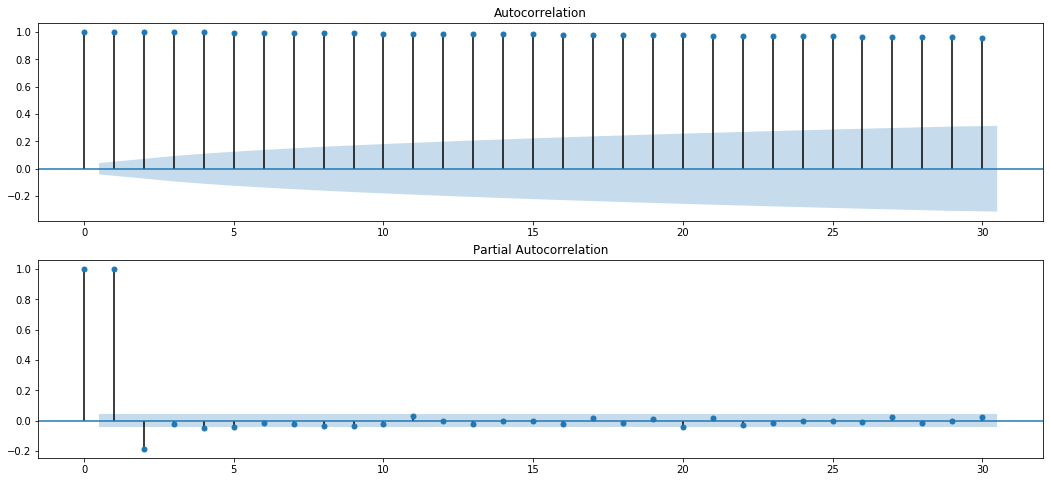

In [28]:
pyplot.subplot(211)
plot_acf(y.Banks_finance_insurance, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.Banks_finance_insurance, ax=pyplot.gca(), lags = 30)
pyplot.show()

In [29]:
#if the time series is stationary, the ACF/PACF plots will show a quick drop-off in 
#correlation after a small amount of lag between points.

In [30]:
# like these we can do for each and every sector in stock maket.

In [31]:
#Plotting Rolling Statistics
#We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
#The time series is hence not stationary
# Augmented Dicky-Fuller test
# This is doing also for check the data set is stationary or non-stationary
# And next we get this dicky fuller test $ rolling to a function for a further use

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df_ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df_ts.rolling(window = 12, center = False).mean()
    rolstd = df_ts.rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df_ts, 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df_ts, 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    
    if (dftest[1]>0.05):
        print("The time series is NOT stationary at the p = 0.05 level.")
    else:
        print("The time series is stationary at the p = 0.05 level.")
                    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [33]:
# if test stastic < critical value it means data set is stationary 
# # if test stastic > critical value it means data set is non-stationary
# in here dataset is non-sationary

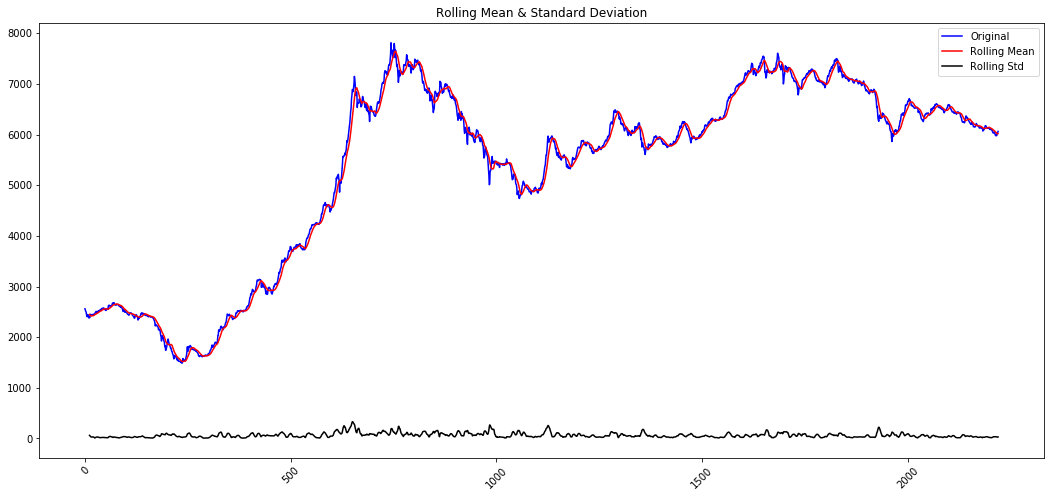

Results of Dickey-Fuller Test:
The time series is NOT stationary at the p = 0.05 level.
Test Statistic                   -1.660761
p-value                           0.451434
# Lags Used                      11.000000
Number of Observations Used    2209.000000
Critical Value (1%)              -3.433314
Critical Value (5%)              -2.862849
Critical Value (10%)             -2.567467
dtype: float64


In [34]:
ts=df['ASPI']  # We can use this to every column
test_stationarity(ts)

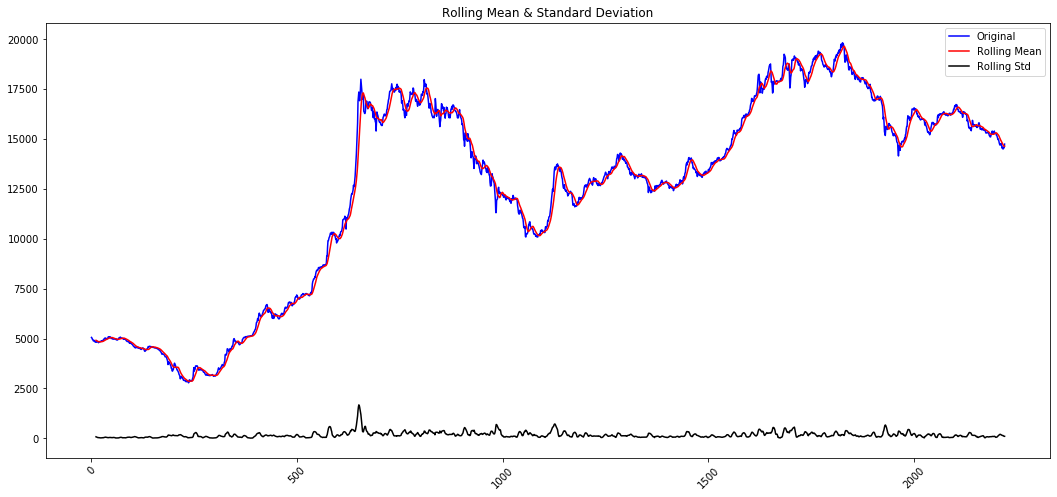

Results of Dickey-Fuller Test:
The time series is NOT stationary at the p = 0.05 level.
Test Statistic                   -1.529416
p-value                           0.518913
# Lags Used                      10.000000
Number of Observations Used    2210.000000
Critical Value (1%)              -3.433312
Critical Value (5%)              -2.862849
Critical Value (10%)             -2.567467
dtype: float64


In [35]:
ts1=df['Banks_finance_insurance']  # We can use this to every column
test_stationarity(ts1)

In [36]:
#Eliminating trend and seasonality -Log scale transformation 
#  Log scale transformation .We can apply transformation which penalize higher values more than smaller values.
# for that we can get log value

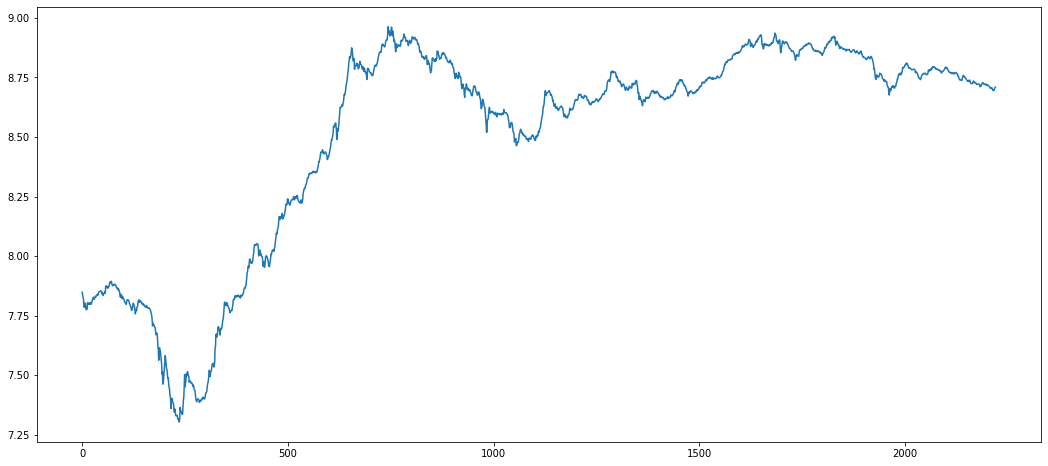

In [37]:
ts_log = np.log(ts)
plt.plot(ts_log)

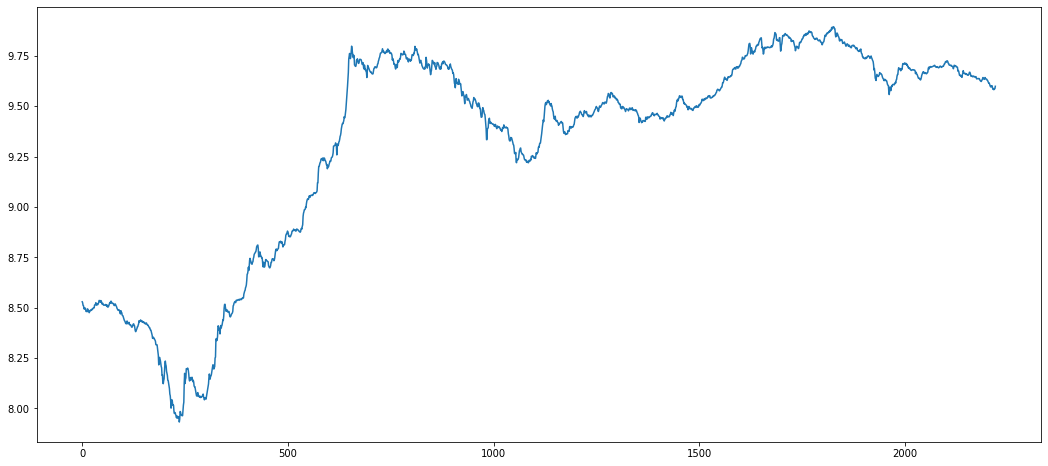

In [38]:
ts1_log = np.log(ts1)
plt.plot(ts1_log)

In [39]:
# lets check ASPI column stationarity using previous create function

In [40]:
# like wise we can do for all columns

In [41]:
# Techniques to remove Trend-diffrencing
# In this technique, we take the difference of the observation at a particular instant with that at the previous instant.
# First order differencing in Pandas

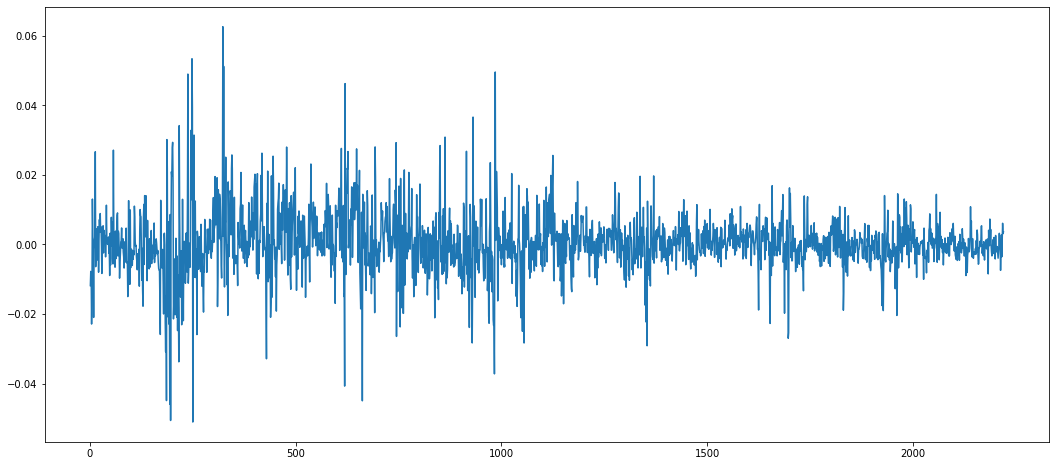

In [42]:
ts_log_diff = ts_log - ts_log.shift() # or we can wrote ts_log.ASPI -ts_log.ASPI.shift()
plt.plot(ts_log_diff)

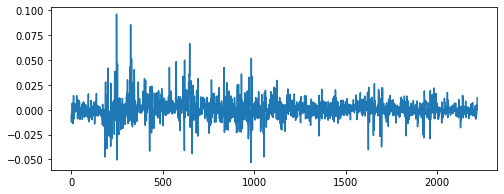

In [64]:
ts1_log_diff = ts1_log - ts1_log.shift() # or we can wrote ts_log.ASPI -ts_log.ASPI.shift()
plt.plot(ts1_log_diff)
from pylab import rcParams
-

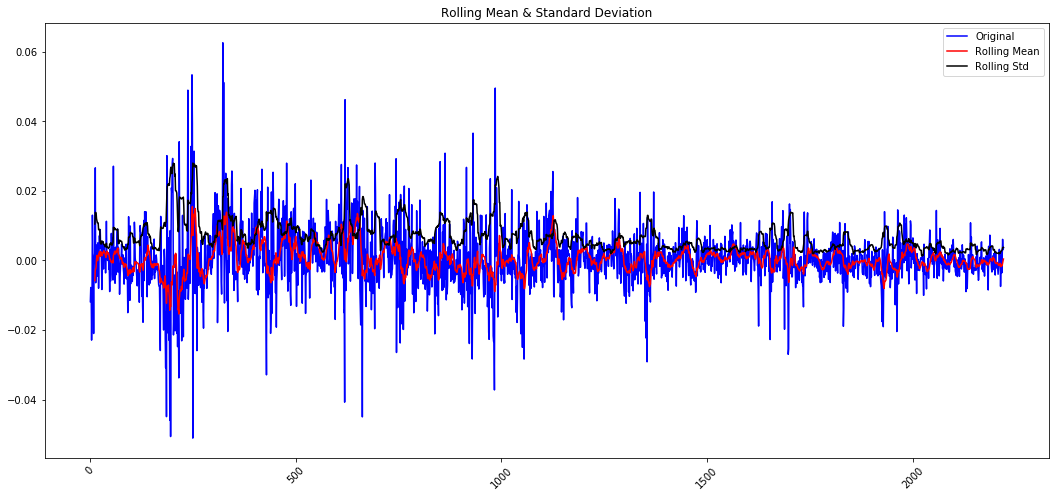

Results of Dickey-Fuller Test:
The time series is stationary at the p = 0.05 level.
Test Statistic                -1.033340e+01
p-value                        2.804142e-18
# Lags Used                    1.200000e+01
Number of Observations Used    2.207000e+03
Critical Value (1%)           -3.433316e+00
Critical Value (5%)           -2.862850e+00
Critical Value (10%)          -2.567468e+00
dtype: float64


In [67]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

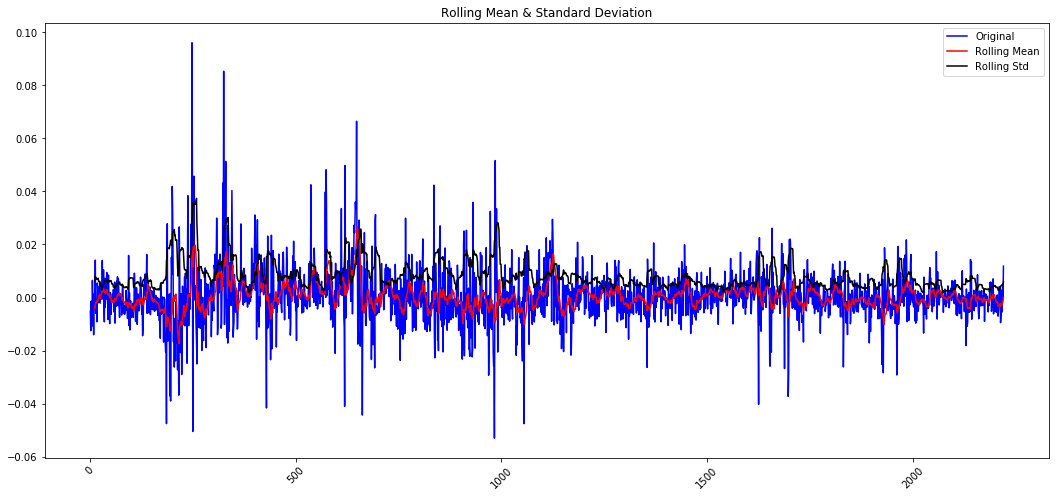

Results of Dickey-Fuller Test:
The time series is stationary at the p = 0.05 level.
Test Statistic                -1.703348e+01
p-value                        8.293205e-30
# Lags Used                    4.000000e+00
Number of Observations Used    2.215000e+03
Critical Value (1%)           -3.433306e+00
Critical Value (5%)           -2.862846e+00
Critical Value (10%)          -2.567465e+00
dtype: float64


In [92]:
ts1_log_diff.dropna(inplace=True)
test_stationarity(ts1_log_diff)

In [68]:
# Techniques to remove Trend - Decomposition: trend, seasonality, residuals
# Here we use Decomposition.

In [69]:
# Decomposition
# In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.


In [95]:
def plot_decomposition(df, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 4), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  
  plt.show()
  
  plt.close()
  
  return

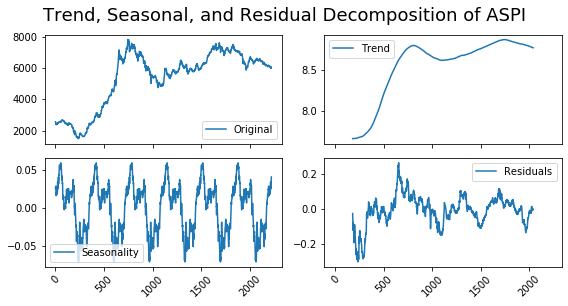

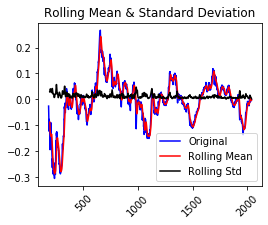

Results of Dickey-Fuller Test:
The time series is stationary at the p = 0.05 level.
Test Statistic                   -3.377158
p-value                           0.011763
# Lags Used                      12.000000
Number of Observations Used    1844.000000
Critical Value (1%)              -3.433901
Critical Value (5%)              -2.863109
Critical Value (10%)             -2.567605
dtype: float64


In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 365) # in here we decompose log values of ASPI. or we can decompose df[ASPI].but best is decompose log value of ASPI

df.loc[:,'trend'] = decomposition.trend
df.loc[:,'seasonal'] = decomposition.seasonal
df.loc[:,'residual'] = decomposition.resid

plot_decomposition(df, 
                   ts = 'ASPI', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

display(HTML("<b>The stationarity test of residual:</b>"))
test_stationarity(df.dropna()['residual'])


In [66]:
def plot_decomposition1(df, ts1, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts1], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts1), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

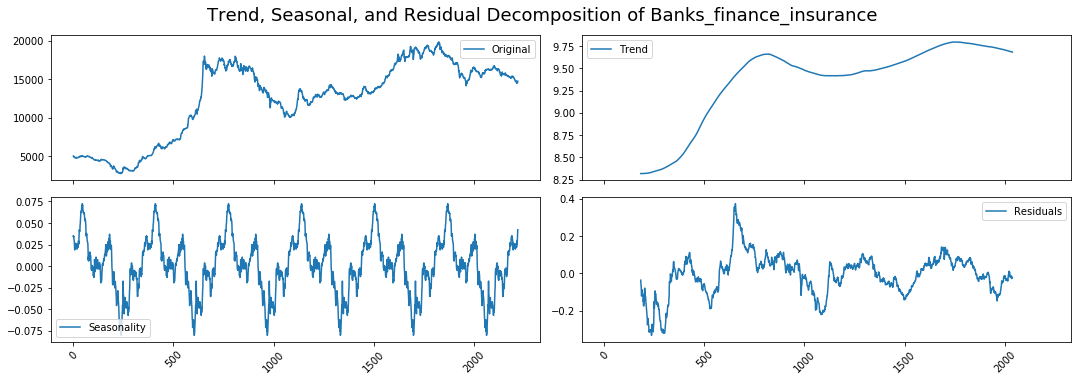

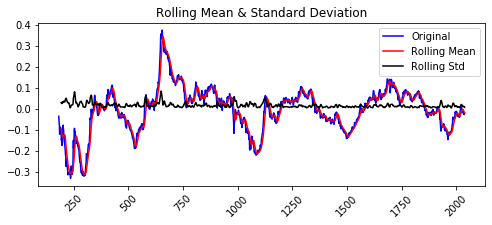

Results of Dickey-Fuller Test:
The time series is stationary at the p = 0.05 level.
Test Statistic                   -3.255057
p-value                           0.017011
# Lags Used                      12.000000
Number of Observations Used    1844.000000
Critical Value (1%)              -3.433901
Critical Value (5%)              -2.863109
Critical Value (10%)             -2.567605
dtype: float64


In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, freq = 365) # in here we decompose log values of ASPI. or we can decompose df[ASPI].but best is decompose log value of ASPI

df.loc[:,'trend'] = decomposition.trend
df.loc[:,'seasonal'] = decomposition.seasonal
df.loc[:,'residual'] = decomposition.resid

plot_decomposition1(df, 
                   ts1 = 'Banks_finance_insurance', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

display(HTML("<b>The stationarity test of residual:</b>"))
test_stationarity(df.dropna()['residual'])
rcParams['figure.figsize'] = 8, 3

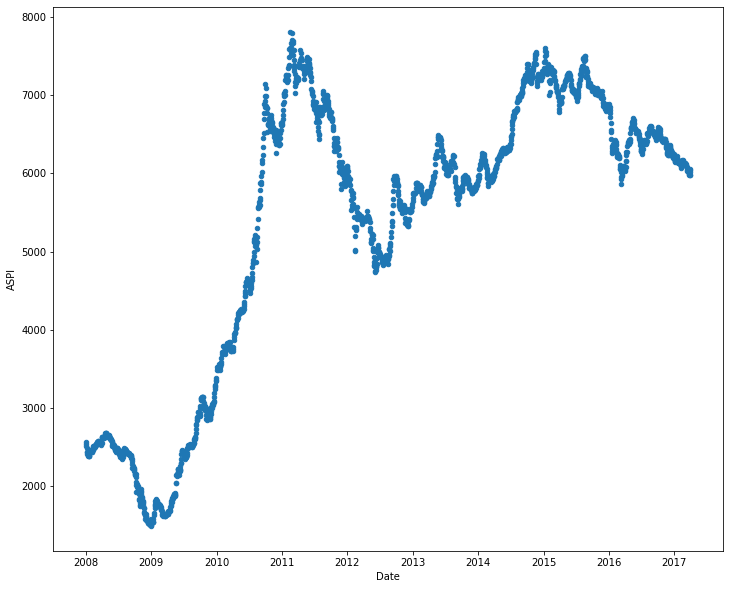

In [72]:
df[['Date','ASPI']].plot.scatter('Date','ASPI', figsize=(12,10))

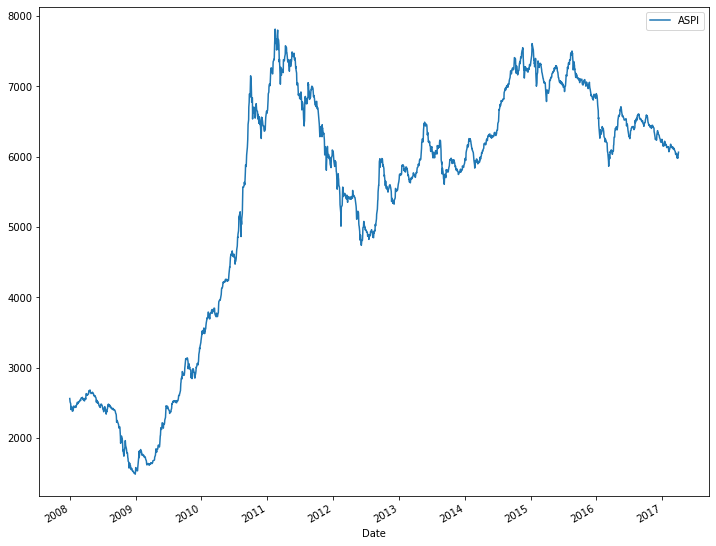

In [73]:
df[['Date','ASPI']].plot('Date', figsize=(12,10))

In [74]:
np.percentile(df.Banks_finance_insurance,[99])

array([19286.916])

In [75]:
 np.percentile(df.Banks_finance_insurance,[99])[0]

19286.916

In [76]:
uv=np.percentile(df.Banks_finance_insurance,[99])[0]

In [77]:
df[(df.Banks_finance_insurance>uv)]

,Date,ASPI,Banks_finance_insurance,trend,seasonal,residual
1766,2015-05-20,7289.77,19289.25,8.867188,-0.026605,0.053644
1767,2015-05-21,7273.69,19409.79,8.866886,-0.027234,0.052368
1768,2015-05-22,7288.74,19391.53,8.866575,-0.027227,0.054738
1771,2015-05-27,7253.50,19347.53,8.865663,-0.029876,0.053453
1772,2015-05-28,7255.71,19286.96,8.865339,-0.024426,0.048631
1773,2015-05-29,7220.29,19295.32,8.865008,-0.025430,0.045073
1814,2015-07-29,7313.97,19290.36,8.848309,0.012221,0.037012
1815,2015-07-30,7332.05,19298.06,8.848065,0.012358,0.039588
1816,2015-08-03,7336.59,19378.09,8.847818,0.016593,0.036218
1817,2015-08-04,7310.05,19317.09,8.847570,0.017120,0.032316


In [78]:
df.Banks_finance_insurance[(df.Banks_finance_insurance>3*uv)]=3*uv

In [79]:
 np.percentile(df.ASPI,[1])[0]

1576.692

In [80]:
lv=np.percentile(df.ASPI,[1])[0]

In [81]:
df[(df.ASPI<lv)]

,Date,ASPI,Banks_finance_insurance,trend,seasonal,residual
216,2008-11-26,1571.29,2983.42,7.666641,-0.043710,-0.263279
223,2008-12-05,1567.17,2939.07,7.668451,-0.037281,-0.274144
224,2008-12-08,1548.69,2905.71,7.668771,-0.036976,-0.286631
225,2008-12-10,1568.91,2918.13,7.669146,-0.037717,-0.273293
226,2008-12-11,1561.38,2916.89,7.669517,-0.041490,-0.274702
227,2008-12-15,1527.51,2890.93,7.669856,-0.048356,-0.290106
228,2008-12-16,1524.19,2876.34,7.670192,-0.053612,-0.287362
229,2008-12-17,1525.52,2846.64,7.670512,-0.056901,-0.283520
230,2008-12-18,1526.27,2868.45,7.670840,-0.061455,-0.278802
231,2008-12-19,1526.76,2837.88,7.671193,-0.065902,-0.274388


In [82]:
df.ASPI[(df.ASPI <0.3*lv)]=0.3*lv

In [83]:
df[(df.ASPI<lv)]

,Date,ASPI,Banks_finance_insurance,trend,seasonal,residual
216,2008-11-26,1571.29,2983.42,7.666641,-0.043710,-0.263279
223,2008-12-05,1567.17,2939.07,7.668451,-0.037281,-0.274144
224,2008-12-08,1548.69,2905.71,7.668771,-0.036976,-0.286631
225,2008-12-10,1568.91,2918.13,7.669146,-0.037717,-0.273293
226,2008-12-11,1561.38,2916.89,7.669517,-0.041490,-0.274702
227,2008-12-15,1527.51,2890.93,7.669856,-0.048356,-0.290106
228,2008-12-16,1524.19,2876.34,7.670192,-0.053612,-0.287362
229,2008-12-17,1525.52,2846.64,7.670512,-0.056901,-0.283520
230,2008-12-18,1526.27,2868.45,7.670840,-0.061455,-0.278802
231,2008-12-19,1526.76,2837.88,7.671193,-0.065902,-0.274388


In [84]:
df.describe()

,ASPI,Banks_finance_insurance,trend,seasonal,residual
count,2221.000000,2221.000000,1857.000000,2221.000000,1857.000000
mean,5362.548874,12440.647776,8.559289,0.000352,-0.008066
std,1788.476749,4884.861153,0.363420,0.031972,0.086359
min,1484.530000,2784.500000,7.663803,-0.070641,-0.305157
25%,4219.600000,8572.840000,8.603578,-0.026605,-0.042746
50%,6007.650000,13485.540000,8.695461,0.009350,-0.000474
75%,6678.050000,16287.620000,8.794578,0.021988,0.042327
max,7811.800000,19828.660000,8.871292,0.059284,0.266858


In [98]:
df.to_csv("df.csv",header=True)